# Circuits quantiques avec Qiskit

## Circuit quantique à 1 qubit et 1 bit cbit
1. Définir un régistre quantique `q1` à un qubit;
2. Définir également un registre classique `c1` à 1 cbit;
3. Construire un circuit quantique `qc1` contenant `q1` et `c1`;
4. Appliquer l'opérateur $\mathbf{X}$ sur le qubit;
5. Mesurer le qubit et stocker le résultat de mesure dans le cbit.

In [1]:
# Écrire votre code ici
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

q1 = QuantumRegister(1)
c1 = ClassicalRegister(1)

qc1 = QuantumCircuit(q1, c1)
qc1.x(q1)
qc1.measure(q1, c1)

6. Dessiner le circuit quantique

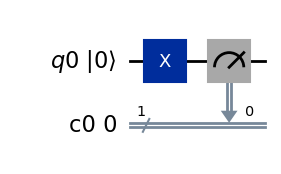

In [3]:
# Écrire votre code ici
qc1.draw('mpl', initial_state=True)

7. Pour ce cicuit simple, on désire visualiser le résultat qu'obtiendrait le simulateur `AerSimulator`. Écrire le code permettant d'importer le nécessaire, puis de visualiser le résultat de mesure dans un histogramme pour 2000 shots.

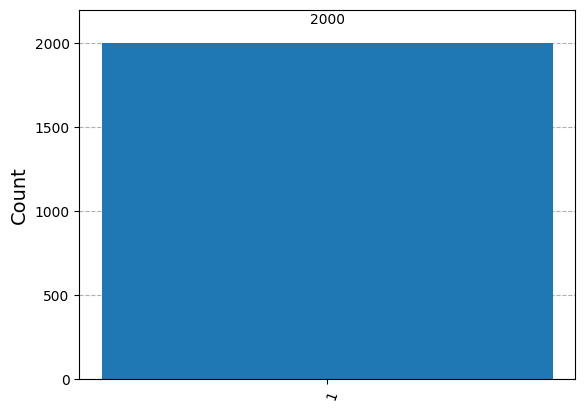

In [4]:
# Écrire votre code ici
# Importation d'histogram
from qiskit.visualization import plot_histogram
# Importation du simulateur et transpile
from qiskit_aer import AerSimulator
from qiskit import transpile

Qsim = AerSimulator()
compiqc1 = transpile(qc1, Qsim)

job1 = Qsim.run(compiqc1, shots=2000)

result1 = job1.result()
qc1count = result1.get_counts(compiqc1)

plot_histogram(qc1count)

## Circuit multi-qubits

À présent, nous savons contruire un circuit quantique, l'afficher et effectuer une simulation en nous servant d'un simulateur sur ledit circuit. La tâche suivante consiste à construire un circuit quantique et d'y effectuer les opérations suivantes:
1. Construction du circuit
   - définir un registre quantique q2 de 4 qubits;
   - définir un registre classique c2 de 4 bits;
   - construire un circuit quantique `qc2` contenant `q2` et `c2`;
   - appliquer la porte d'Hadamard le qubit d'indexe 2;
   - appliquer pour chaque qubit d'indexe impaire la porte contrôlée $\mathbf{CX}$ en prenant comme qubit de contrôle le qubit d'indexe 2;
   - appliquer pour chaque qubit d'indexe paire la porte contrôlée $\mathbf{CRY}$ en prenant comme qubit de contrôle le qubit d'indexe 2 à l'état $\ket{0}$, l'angle devant être $\pi/4$;
   - sur chaque qubit, appliquer la porte $\mathbf{U}$ avec $\theta=\pi/(indexe+1),\,\phi=\pi/2$ et $\lambda =\pi/4$;
   - appliquer la porte contrôlée $\mathbf{CP}$ sur le premier et le dernier qubit, le dernier qubit et le qubit de contrôle et $\lambda=\pi/6$
   - mesurer les qubits et stocker les resultats de mesure dans les cbits dans l'ordre inverse

In [5]:
# Écrire votre code ici
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from math import pi

#Construire un circuit quantique qc2 contenant q2 et c2;
q2 = QuantumRegister(4)
c2 = ClassicalRegister(4)

qc2 = QuantumCircuit(q2, c2)

#appliquer la porte d’Hadamard le qubit d’indexe 2;
qc2.h(q2[2])

#appliquer pour chaque qubit d’indexe impaire la porte contrôlée CX en prenant comme qubit de contrôle le qubit d’indexe 2
qc2.cx(q2[2], q2[1])
qc2.cx(q2[2], q2[3])

#appliquer pour chaque qubit d’indexe paire la porte contrôlée CRY en prenant comme qubit de contrôle le qubit d’indexe 2 à l’état 
#∣0⟩ l’angle devant être π/4
qc2.cry(pi/4,q2[2],q2[0], ctrl_state='0')

# sur chaque qubit, appliquer la porte $\mathbf{U}$ avec $\theta=\pi/(indexe+1),\,\phi=\pi/2$ et $\lambda =\pi/4$
qc2.u(pi,pi/2,pi/4,q2[0])
qc2.u(pi/2,pi/2,pi/4,q2[1])
qc2.u(pi/3,pi/2,pi/4,q2[2])
qc2.u(pi/4,pi/2,pi/4,q2[3])

# appliquer la porte contrôlée $\mathbf{CP}$ sur le premier et le dernier qubit,
#le dernier qubit et le qubit de contrôle et $\lambda=\pi/6$
qc2.cp(pi/6, q2[3], q2[0])

#mesurer les qubits et stocker les resultats de mesure dans les cbits dans l’ordre inverse
for i in range(4):
    qc2.measure(q2[i],c2[3-i])

2. Dessiner lecircuit

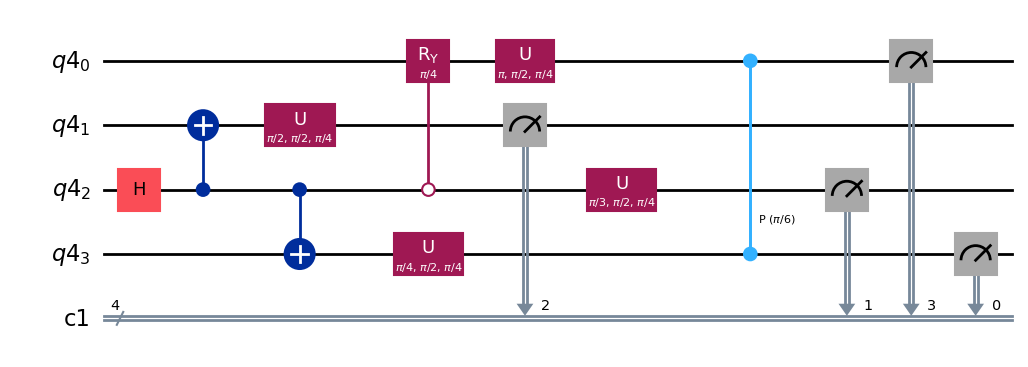

In [6]:
qc2.draw('mpl')

3. Comme dans le cas précédent, écrire le code permettant d'importer le nécessaire, puis de visualiser le résultat de mesure dans un histogramme pour 2000 shots en utilisant `AerSimulator`.

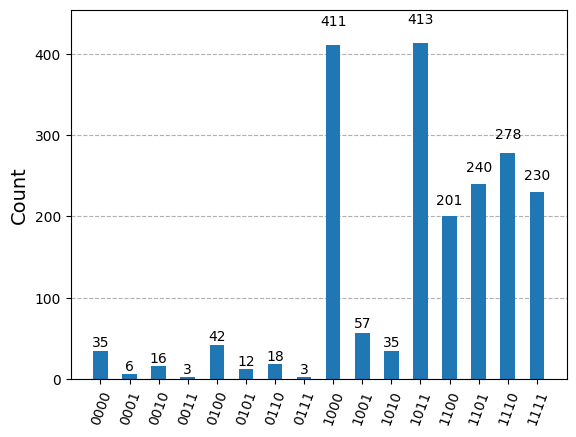

In [8]:
# Écrire votre code ici
# Importation d'histogram
from qiskit.visualization import plot_histogram
# Importation du simulateur et transpile
from qiskit_aer import AerSimulator
from qiskit import transpile

Qsim2 = AerSimulator()
compiqc2 = transpile(qc2, Qsim2)

job2 = Qsim2.run(compiqc2, shots=2000)

result2 = job2.result()
qc2count = result2.get_counts(compiqc2)

plot_histogram(qc2count)

4. À la suite de la mesure, quels sont les états les plus probables?
 - Votre réponse ici: $\ket{1000}$ et $\ket{1011}$.

5. Reconstruire le circuit et mettre les résultats de mesure des qubits dans l'ordre dans les cbits,lancer la simulation et afficher l'histogramme.
   - Quels sont les états les plus probables?
   - Que peut-on conclure quand à la lecture du résultat?

In [11]:
# Écrire votre code ici
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from math import pi

#Construire un circuit quantique qc2 contenant q3 et c2;
q3 = QuantumRegister(4)
c3 = ClassicalRegister(4)

qc3 = QuantumCircuit(q3, c3)

#appliquer la porte d’Hadamard le qubit d’indexe 2;
qc3.h(q3[2])

#appliquer pour chaque qubit d’indexe impaire la porte contrôlée CX en prenant comme qubit de contrôle le qubit d’indexe 2
qc3.cx(q3[2], q3[1])
qc3.cx(q3[2], q3[3])

#appliquer pour chaque qubit d’indexe paire la porte contrôlée CRY en prenant comme qubit de contrôle le qubit d’indexe 2 à l’état 
#∣0⟩ l’angle devant être π/4
qc3.cry(pi/4,q3[2],q3[0], ctrl_state='0')

# sur chaque qubit, appliquer la porte $\mathbf{U}$ avec $\theta=\pi/(indexe+1),\,\phi=\pi/2$ et $\lambda =\pi/4$
qc3.u(pi,pi/2,pi/4,q3[0])
qc3.u(pi/2,pi/2,pi/4,q3[1])
qc3.u(pi/3,pi/2,pi/4,q3[2])
qc3.u(pi/4,pi/2,pi/4,q3[3])

# appliquer la porte contrôlée $\mathbf{CP}$ sur le premier et le dernier qubit,
#le dernier qubit et le qubit de contrôle et $\lambda=\pi/6$
qc3.cp(pi/6, q3[3], q3[0])

#mesurer les qubits et stocker les resultats de mesure dans les cbits dans l’ordre inverse
for i in range(4):
    qc3.measure(q3[i],c3[i])

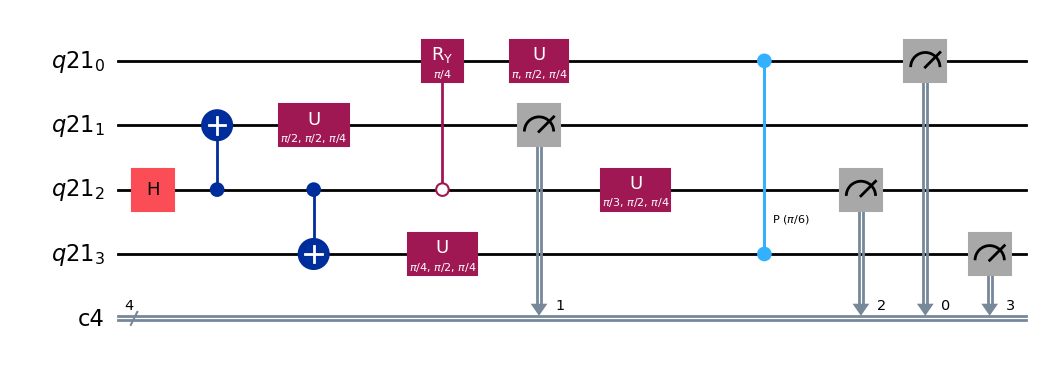

In [12]:
qc3.draw('mpl')

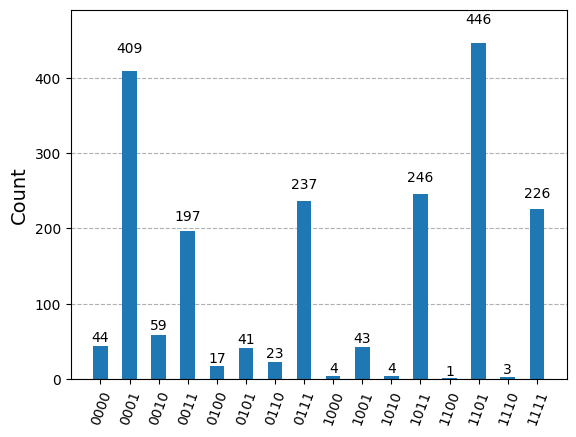

In [13]:
# Écrire votre code ici
# Importation d'histogram
from qiskit.visualization import plot_histogram
# Importation du simulateur et transpile
from qiskit_aer import AerSimulator
from qiskit import transpile

Qsim3 = AerSimulator()
compiqc3 = transpile(qc3, Qsim3)

job3 = Qsim3.run(compiqc3, shots=2000)

result3 = job3.result()
qc3count = result3.get_counts(compiqc3)

plot_histogram(qc3count)

- Les états les plus probable sont $\ket{0001}$ et $\ket{1101}$
- Le sens de stockage et de lecture influence beaucoup l'interprétation des résultats de mesure.